# **시계열 데이터의 유사도 측정 방법 연구**

### 창원대 전자공학과 20145234 황주효 (Hwang Ju-hyo, Department of Electronic Engineering, Changwon University)
---

시계열 데이터들 간의 유사도를 어떻게 측정할 것인가? 우선 측정시 아래를 가정한다.

* 크기, 위상 간의 차이가 크면 유사도가 낮아야한다.
* 비슷한 데이터라면 유사도가 높아야한다.
* 단순히 shift된 경우라도 유사도는 높아야한다.
* 비교하는 두 개의 데이터(유사한 데이터)의 관측 길이가 달라도 유사도는 높아야한다.

구글, 깃허브, Stack Overflow 등을 이용한 조사 결과 아래 7가지의 방법을 발견하였다.

1. 유클리드 거리 측정
2. polyfit을 이용한 유클리드 거리 측정
3. tsfresh을 이용한 특성 추출 및 계산
4. 코사인 유사도를 이용한 시계열 데이터 유사도 측정
5. DTW(Dynamic Time Wraping)을 이용한 유사도 측정
6. LCSS(Longest Common Subsequence)
7. EDR(Edit Distance with Real Sequence)

![](img/A-Summary-of-Similarity-Measures.png)

## **1. 유클리드 거리 측정**
---

![](img/uc1.png)

* 흔히 우리가 알고 있는 피타고라스를 이용한 유클리드 거리를 구하는 것이다. 그리고 다차원인 상태일 떄 거리를 구하는 건 아래 그림과 같이 값만 추가하면 된다.

![](img/uc2.png)

* 시계열 데이터에 적용해 그림으로 보면 아래와 같다.

![](img/ed.png)

* 실제 결과에 적용할때는 MSE(Mean Square Error)를 사용한다.
1. 시계열간의 거리에 대한 합을 구한다
2. 관측시간을 나눠 평균을 구한다.

### **장점**
1. 계산이 단순
2. 연산속도가 뛰어남

### **단점**
1. 신호의 떨림과 움직임이 심해질수록 결과가 어긋나는 현상 발생
2. 길이가 다른 시계열 분석 불가

### **사용할 데이터 불러오기 및 시각화**
---

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
data = pd.read_csv('data_new.csv')
date = datetime.strptime(data['data_date'][0], '%Y-%m-%d %H:%M:%S.%f').strftime('%m/%d/%Y')
date = pd.DataFrame(data['data_date'])
data['date'] = date.applymap(str).applymap(lambda s: '{}-{}-{} {}:{}:{}'.format(
    s[0:4], s[5:7], s[8:10],s[11:13],s[14:16],s[17:19]))
data.index = pd.to_datetime(data['date'])
data = data.drop(columns = ['data_date', 'date'])
data = data['2020-12-09 00:00:00':'2020-12-09 23:59:59']
data.columns = ['oil_temperature']


In [61]:
data

,oil_temperature
date,
2020-12-09 00:00:00,1.33
2020-12-09 00:00:01,0.63
2020-12-09 00:00:02,0.63
2020-12-09 00:00:03,0.86
2020-12-09 00:00:04,0.86
...,...
2020-12-09 23:59:55,3.00
2020-12-09 23:59:56,3.23
2020-12-09 23:59:57,3.47


In [62]:
data.head()

,oil_temperature
date,
2020-12-09 00:00:00,1.33
2020-12-09 00:00:01,0.63
2020-12-09 00:00:02,0.63
2020-12-09 00:00:03,0.86
2020-12-09 00:00:04,0.86


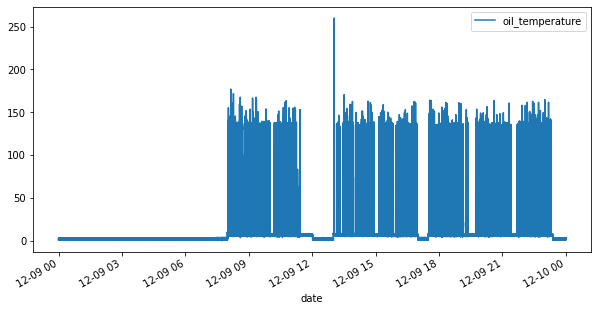

In [63]:
data.plot(figsize = (10, 5))
plt.show()

* 2020-12-09 하루 데이터인 것을 확인 할 수 있다.

기간이 너무 길어 패턴을 확인하기 힘드므로 특정 구간 시각화

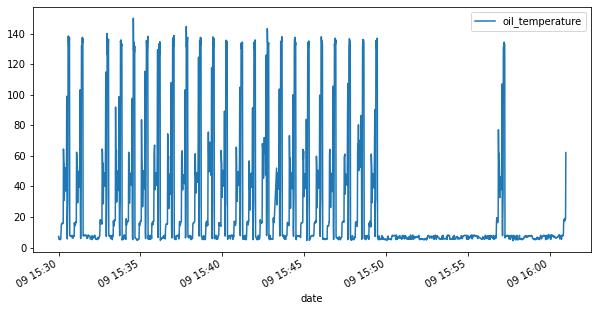

In [64]:
data['2020-12-09 15:30': '2020-12-09 16:00'].plot(figsize = (10, 5))
plt.show()

* 다양한 패턴이 존재

### **비교할 시계열 준비 및 계산**
---

* 비교하기에 앞서 유사한 데이터(1초 이동) 준비 및 MSE 계산
* r2 score가 조금 더 정규화된 결과를 보여준다.

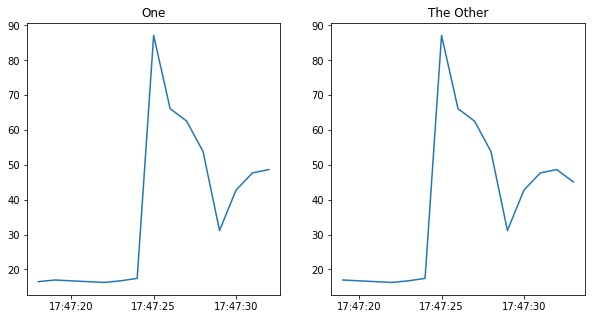

In [65]:
import numpy as np
np.random.seed(777)
seed = np.random.choice(len(data), 1)[0]
WINDOW_SIZE = 15
data_1 = data.iloc[seed:seed+WINDOW_SIZE, ]

data_2 = data.iloc[seed+1:seed+WINDOW_SIZE+1, ]

fig, axes = plt.subplots(1, 2, figsize = (10, 5))
axes[0].plot(data_1)
axes[0].set_title('One')
axes[1].plot(data_2)
axes[1].set_title('The Other')
plt.show()

In [66]:
# MSE 계산

from sklearn.metrics import r2_score

print('MSE : {}'.format(r2_score(data_1, data_2)))

MSE : 0.1888032254200669


* 서로 다른 데이터간의 MSE 계산

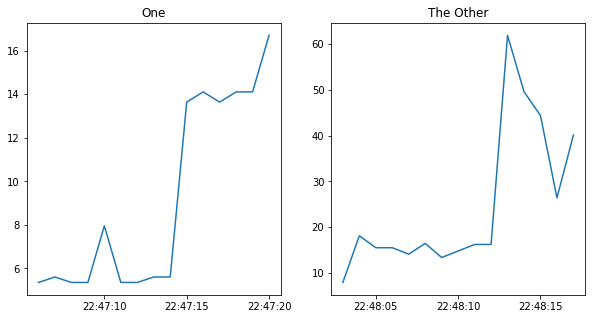

In [67]:
seed = np.random.choice(len(data), 1)[0]
WINDOW_SIZE = 15
data_3 = data.iloc[seed:seed+WINDOW_SIZE, ]

data_4 = data.iloc[seed+57:seed+WINDOW_SIZE+57, ]

fig, axes = plt.subplots(1, 2, figsize = (10, 5))
axes[0].plot(data_3)
axes[0].set_title('One')
axes[1].plot(data_4)
axes[1].set_title('The Other')
plt.show()

In [68]:
# MSE 계산

print('MSE : {}'.format(r2_score(data_3, data_4)))

MSE : -20.182246730896757


### **결론**
---

* 유사한 데이터끼리는 MSE가 낮고, 전혀 다른 데이터끼리는 MSE가 높다.
* 유사한 데이터라도 급격한 변화의 차이가 있다면 MSE가 오히려 전혀 다른 데이터보다 높게 나온다.
* Time Shift된 데이터와의 비교에서 실제로는 비슷한 데이터지만 모두 완전한 변화라고 감지하여 유사도가 낮게 측정되므로 유사도 측정 방법으로 사용하기에는 적절치 않다.

## **2. Polyfit을 이용한 유클리드 거리 측정**
---

* Curve Fitting with Polynomials(다항식 곡선 피팅)
    * 입력 변수와 출력 변수간의 상관관계를 보고 함수를 구하는 방법
    * N차 다항식 설정 가능(차수)
    
* 각 패턴에 대해 일반화가 가능할 것이라 예상
* 차수 설정으로 파라미터 최적화 가능

    
* 그림과 같이 데이터가 있을 때 N차 다항식을 예측하여 두번째 그림과 같은 곡선을 구한다.

![](img/modeldatawithpolynomialexample_01_ko_KR.png)
![](img/modeldatawithpolynomialexample_02_ko_KR.png)


* 차수에 따른 곡선의 변화

![](img/997309405C0FD8281D.png)

* 두 곡선이 완전히 일치한다면 R2 Score는 1
* 두 곡선이 완전히 다르다면 R2 Score는 0 미만이 나오고 최저값이 없다.

### **데이터 준비 및 적용**
---

* t0 : 기준 데이터
* t1 : 1초 후 데이터
* t3 : 3초 후 데이터

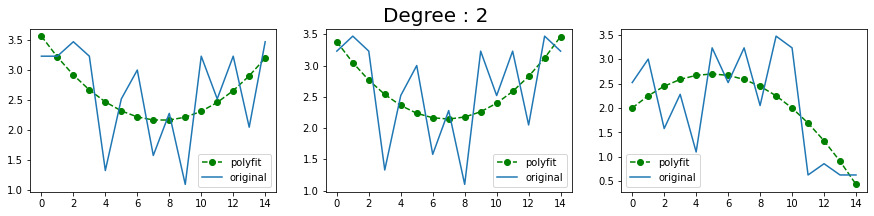


 ------------------------------------------------------------------------------------------------------------


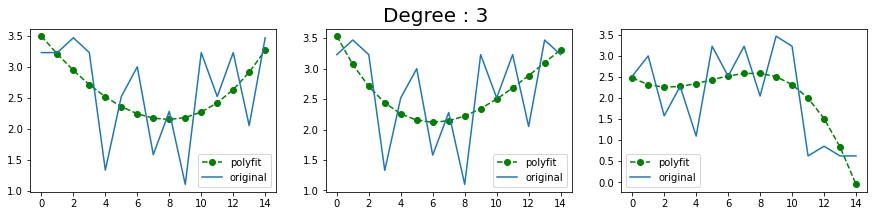


 ------------------------------------------------------------------------------------------------------------


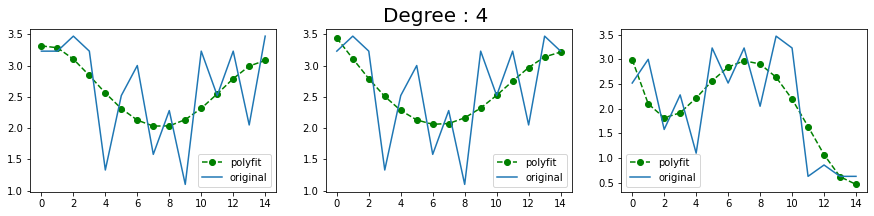


 ------------------------------------------------------------------------------------------------------------


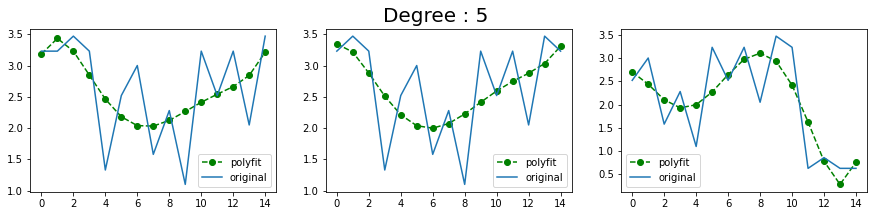


 ------------------------------------------------------------------------------------------------------------


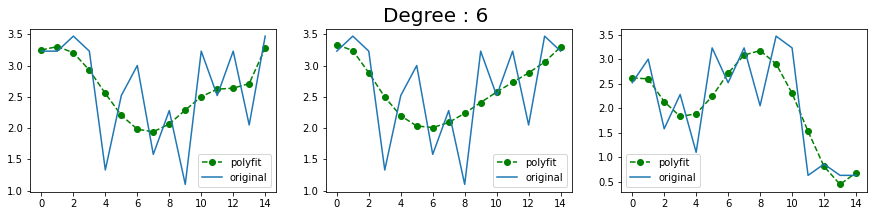


 ------------------------------------------------------------------------------------------------------------


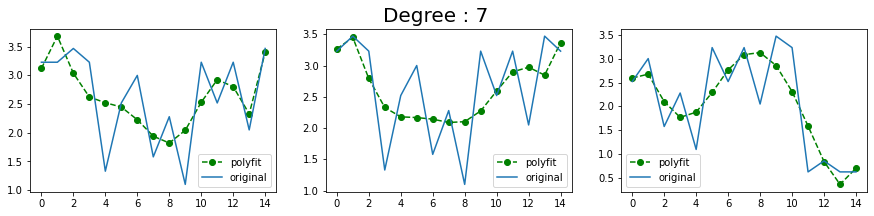


 ------------------------------------------------------------------------------------------------------------


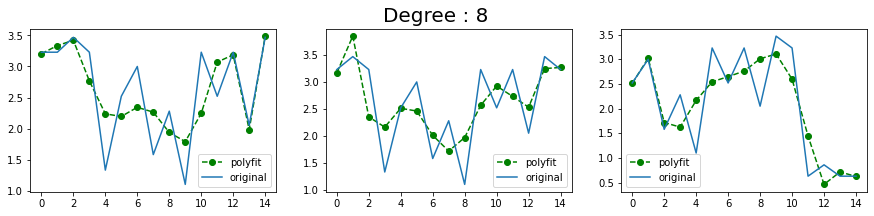


 ------------------------------------------------------------------------------------------------------------


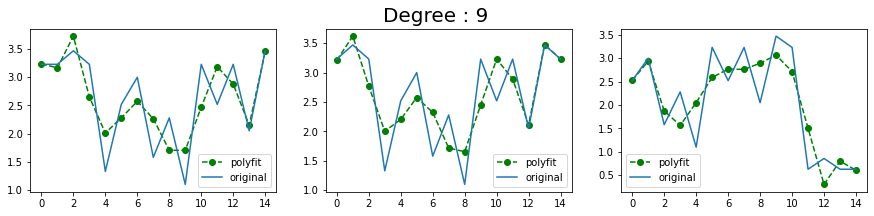


 ------------------------------------------------------------------------------------------------------------


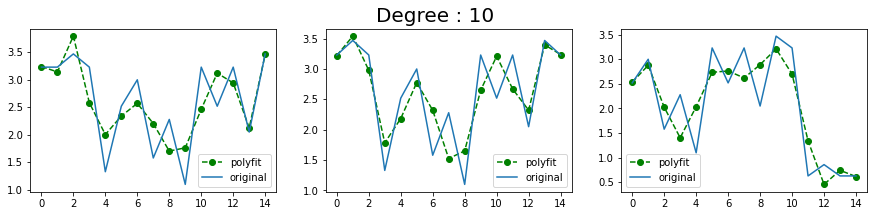


 ------------------------------------------------------------------------------------------------------------


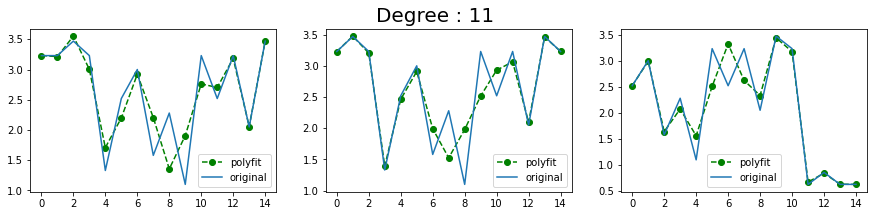


 ------------------------------------------------------------------------------------------------------------


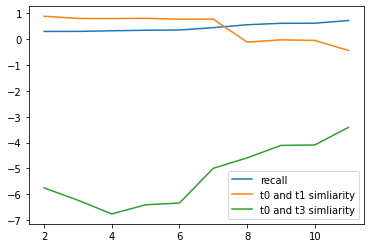

In [69]:
data = data['oil_temperature']
data = pd.DataFrame(data.values.reshape(1, -1))

list_12 = np.array([])
list_23 = np.array([])
list_13 = np.array([])
for_plot = []

r = np.random.choice(10000, 1)
r = r[0]

t = 15

x1 = data.iloc[:, r:r+t].values
x2 = data.iloc[:, r+1:r+t+1].values
x3 = data.iloc[:, r+5:r+t+5].values

data_t = pd.DataFrame(data.values.reshape(-1, ))
data_t

x1_t = data_t.iloc[r:r+t].reset_index(drop = True)
x2_t = data_t.iloc[r+1:r+t+1].reset_index(drop = True)
x3_t = data_t.iloc[r+5:r+5+t].reset_index(drop = True)

p = np.arange(0, t, 1)

for i in range(2, 12):
    degree = i
    fp1 = np.polyfit(p, x1.flatten(), degree)
    f1 = np.poly1d(fp1)

    fp2 = np.polyfit(p, x2.flatten(), degree)
    f2 = np.poly1d(fp2)

    fp3 = np.polyfit(p, x3.flatten(), degree)
    f3 = np.poly1d(fp3)

    fig, ax = plt.subplots(1, 3, figsize = (15, 3))

    plt.suptitle('Degree : {}'.format(degree), fontsize = 20)
    ax[0].plot(p, f1(p),'go--', label = 'polyfit')
    ax[0].plot(x1_t, label = 'original')
    ax[0].legend()
    #ax[0].set_title('Reproduction : {}'.format(r2_score(x1_t, f1(p))))

    ax[1].plot(p, f2(p),'go--', label = 'polyfit')
    ax[1].plot(x2_t, label = 'original')
    ax[1].legend()
    #ax[1].set_title('Reproduction : {}'.format(r2_score(x2_t, f2(p))))


    ax[2].plot(p, f3(p),'go--', label = 'polyfit')
    ax[2].plot(x3_t, label = 'original')
    ax[2].legend()
    #ax[2].set_title('Reproduction : {}'.format(r2_score(x3_t, f3(p))))

    
    plt.show()

    from sklearn.metrics import r2_score, mean_squared_error

    #print('{}차 다항식 자기 재현율 : {}, {}, {}'.format(i,r2_score(x1_t, f1(p)), r2_score(x2_t, f2(p)), r2_score(x3_t, f3(p))))
    #print('유사한 데이터와의 유사도 : {} \n완전히 다른 데이터와의 유사도 : {}'.format(r2_score(f1(p), f2(p)), r2_score(f1(p), f3(p))))
    print('\n ------------------------------------------------------------------------------------------------------------')
    
    list_12 = np.append(list_12, (r2_score(f1(p), f2(p))))
    list_23 = np.append(list_23, (r2_score(f2(p), f3(p))))
    list_13 = np.append(list_13, (r2_score(f1(p), f3(p))))
    
    for_plot.append({'recall' : r2_score(x1_t, f1(p)),
                                         'degree' : i,
                                         'x1x2':r2_score(f1(p), f2(p)),
                                        'x1x3':r2_score(f1(p), f3(p))})
    
recall_list = []
degree_list = []
x1x2_list = []
x1x3_list = []

for i in range(len(for_plot)):
    recall_list.append(for_plot[i]['recall'])
for i in range(len(for_plot)):
    degree_list.append(for_plot[i]['degree'])
for i in range(len(for_plot)):
    x1x2_list.append(for_plot[i]['x1x2'])
for i in range(len(for_plot)):
    x1x3_list.append(for_plot[i]['x1x3'])

plt.plot(degree_list, recall_list, label = 'recall')
plt.plot(degree_list, x1x2_list, label = 't0 and t1 simliarity')
plt.plot(degree_list, x1x3_list, label = 't0 and t3 simliarity')
plt.legend()
plt.show()



### **결론**
---

* 차수가 증가할수록 재현율은 증가하는 경향이 있다.
* 패턴마다 적절한 차수가 다르다.
* 그러나 반대로 비슷한 데이터끼리는 유사성이 감소하고 서로 다른 데이터와도 유사성이 감소한다.
* **특정 패턴마다 파라미터를 찾아야하고, 유사성에 대해 규칙성이 없다.**
* 따라서 일반화가 불가능하다.
* 단순 유클리드 거리 측정보단 더 나아졌지만, 여전히 time shift를 반영하지 못한다.

## **3. tsfresh 라이브러리를 이용한 특성 추출 및 계산**
---

* 시계열 데이터에서 많은 수의 특징 추출 (평균, 분산, 최고점, 최저점, 상관관계 등)
>https://tsfresh.readthedocs.io/en/latest/text/list_of_features.html

* 회귀 및 분류에 대한 특성 설명 및 중요성 평가 가능

![](img/Example-of-time-series-features-that-are-extracted-from-TSFRESH-41-library-These.png)

* 그러나 이 라이브러리는 단순 데이터만 아니라, 레이블링이 된 데이터가 있어야 추출이 가능하게 설계되어있다.
* 따라서 사용이 불가하다.

## **4. 코사인 유사도를 이용한 시계열 데이터 유사도 측정**
---

* 코사인 유사도란 벡터와 벡터 간의 유사도를 비교할 때 두 벡터 간의 사잇각을 구해서 얼마나 유사한지 수치로 나타낸 것
* 벡터 방향이 비슷할 수록 두 벡터는 서로 유사하며, 벡터 방향이 90도 일때는 두 벡터 간의 관련성이 없으며, 벡터 방향이 반대가 될수록 두 벡터는 반대 관계를 보임

![](img/cos1.png)

* 코사인 함수

![](img/cos2.jpg)

* θ를 두 벡터 간의 사잇각이라고 했을 때 θ=0이면, cosθ = 1입니다. 코사인 유사도가 1이면 두 벡터는 완전히 동일한 벡터입니다.

* 두 벡터 간의 사잇각이 90도이면, 코사인 유사도가 0이되고 두 벡터는 상관 관계가 없다고 말합니다. 두 벡터 간의 사잇각이 180도 이면 코사인 유사도는 -1이며, 두 벡터는 완전히 반대인 벡터입니다.

* 현재 데이터에서 벡터 행렬은 음수 값이 없으므로 코사인 유사도는 음수가 되지 않는다. 따라서 코사인 유사도는 0~1 사이의 값을 갖는다.

![](img/cos3.png)

### **데이터 준비 및 적용**
---
### 1) 짧은 데이터 (5초 이하)인 경우

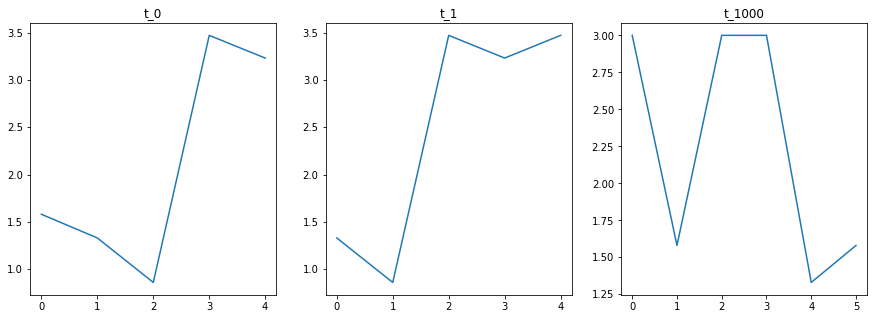

유사한 데이터의 코사인 유사도 : 0.8980961928480997
서로 다른 데이터의 코사인 유사도 : 0.8231506639706768


In [70]:
from sklearn.metrics.pairwise import cosine_similarity

import numpy as np
r = np.random.choice(10000, 1)
r = r[0]

t = 5

x1 = data.iloc[:, r:r+t].values
x2 = data.iloc[:, r+1:r+t+1].values
x3 = data.iloc[:, r+1000:r+t+1000].values

data_t = pd.DataFrame(data.values.reshape(-1, ))

x1_t = data_t.iloc[r:r+t].reset_index(drop = True)
x2_t = data_t.iloc[r+1:r+t+1].reset_index(drop = True)
x3_t = data_t.iloc[r+1000:r+1000+t+1].reset_index(drop = True)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize = (15, 5))

ax[0].plot(x1_t)
ax[0].set_title('t_0')
ax[1].plot(x2_t)
ax[1].set_title('t_1')
ax[2].plot(x3_t)
ax[2].set_title('t_1000')
plt.show()

print('유사한 데이터의 코사인 유사도 : {}'.format(cosine_similarity(x1, x2)[0][0]))
print('서로 다른 데이터의 코사인 유사도 : {}'.format(cosine_similarity(x1, x3)[0][0]))

data = data_t
WINDOW_SIZE = 100

* 관측길이가 짧은 경우 코사인 유사도를 유사도 측정 도구로 사용하기에는 적합하지 않다.

### **데이터 준비 및 적용**
---
### 2) 긴 데이터 (5초 이상)인 경우

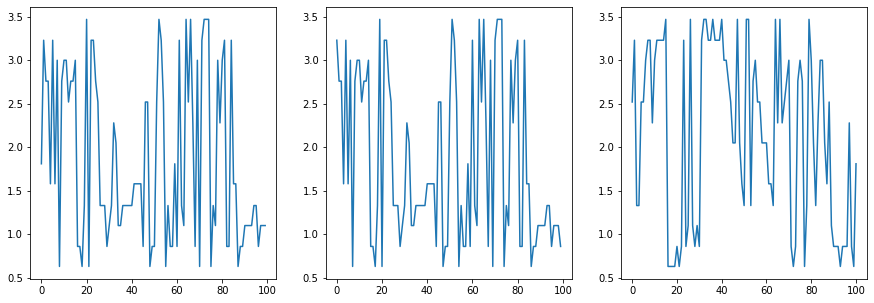

유사한 데이터의 코사인 유사도 : 0.8457395127644639
서로 다른 데이터의 코사인 유사도 : 0.8470779516378296


In [71]:
from sklearn.metrics.pairwise import cosine_similarity

data = pd.read_csv('data_new.csv')
date = datetime.strptime(data['data_date'][0], '%Y-%m-%d %H:%M:%S.%f').strftime('%m/%d/%Y')
date = pd.DataFrame(data['data_date'])
data['date'] = date.applymap(str).applymap(lambda s: '{}-{}-{} {}:{}:{}'.format(
    s[0:4], s[5:7], s[8:10],s[11:13],s[14:16],s[17:19]))
data.index = pd.to_datetime(data['date'])
data = data.drop(columns = ['data_date', 'date'])
data = data['2020-12-09 00:00:00':'2020-12-09 23:59:59']
data.columns = ['oil_temperature']
data = pd.DataFrame(data.values.reshape(1, -1))

import numpy as np
r = np.random.choice(10000, 1)
r = r[0]

t = 100

x1 = data.iloc[:, r:r+t].values
x2 = data.iloc[:, r+1:r+t+1].values
x3 = data.iloc[:, r+1000:r+t+1000].values

data_t = pd.DataFrame(data.values.reshape(-1, ))

x1_t = data_t.iloc[r:r+t].reset_index(drop = True)
x2_t = data_t.iloc[r+1:r+t+1].reset_index(drop = True)
x3_t = data_t.iloc[r+1000:r+1000+t+1].reset_index(drop = True)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize = (15, 5))

ax[0].plot(x1_t)

ax[1].plot(x2_t)

ax[2].plot(x3_t)
plt.show()

print('유사한 데이터의 코사인 유사도 : {}'.format(cosine_similarity(x1, x2)[0][0]))
print('서로 다른 데이터의 코사인 유사도 : {}'.format(cosine_similarity(x1, x3)[0][0]))

WINDOW_SIZE = 43

* 관측 길이가 긴 경우 유사도 측정 도구로 삼기에 적합해보이므로 표준 패턴 설정 후 상위 25개, 하위 25개를 출력해본다.

In [72]:
data = pd.read_csv('data_new.csv')
date = datetime.strptime(data['data_date'][0], '%Y-%m-%d %H:%M:%S.%f').strftime('%m/%d/%Y')
date = pd.DataFrame(data['data_date'])
data['date'] = date.applymap(str).applymap(lambda s: '{}-{}-{} {}:{}:{}'.format(
    s[0:4], s[5:7], s[8:10],s[11:13],s[14:16],s[17:19]))
data.index = pd.to_datetime(data['date'])
data = data.drop(columns = ['data_date', 'date'])
data = data['2020-12-09 00:00:00':'2020-12-09 23:59:59']
data.columns = ['oil_temperature']

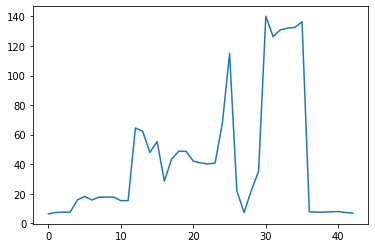

In [73]:
# 찾을 패턴 세팅

data_search = data['2020-12-09 15:32:28':'2020-12-09 15:33:10'].reset_index(drop=True)
plt.plot(data_search)
plt.show()

data = data.reset_index(drop=True)

In [74]:
data

,oil_temperature
0,1.33
1,0.63
2,0.63
3,0.86
4,0.86
...,...
85807,3.00
85808,3.23
85809,3.47
85810,3.23


In [75]:
data_cal = 0
find = []

from operator import itemgetter

for i in range(0, int((len(data)+1))):
    if i+WINDOW_SIZE <= len(data):
        data_cal = data.iloc[i:i+WINDOW_SIZE,]
        #dtw = fastdtw.fastdtw(data_search, data_cal)[0]
        cosine = cosine_similarity(data_search.T, data_cal.T)
        diction = {'data_cal':data_cal, 'cosine':cosine, 'start_index' : i}
        find.append(diction)
        
find_sorted = sorted(find, key=itemgetter('cosine'), reverse= True)

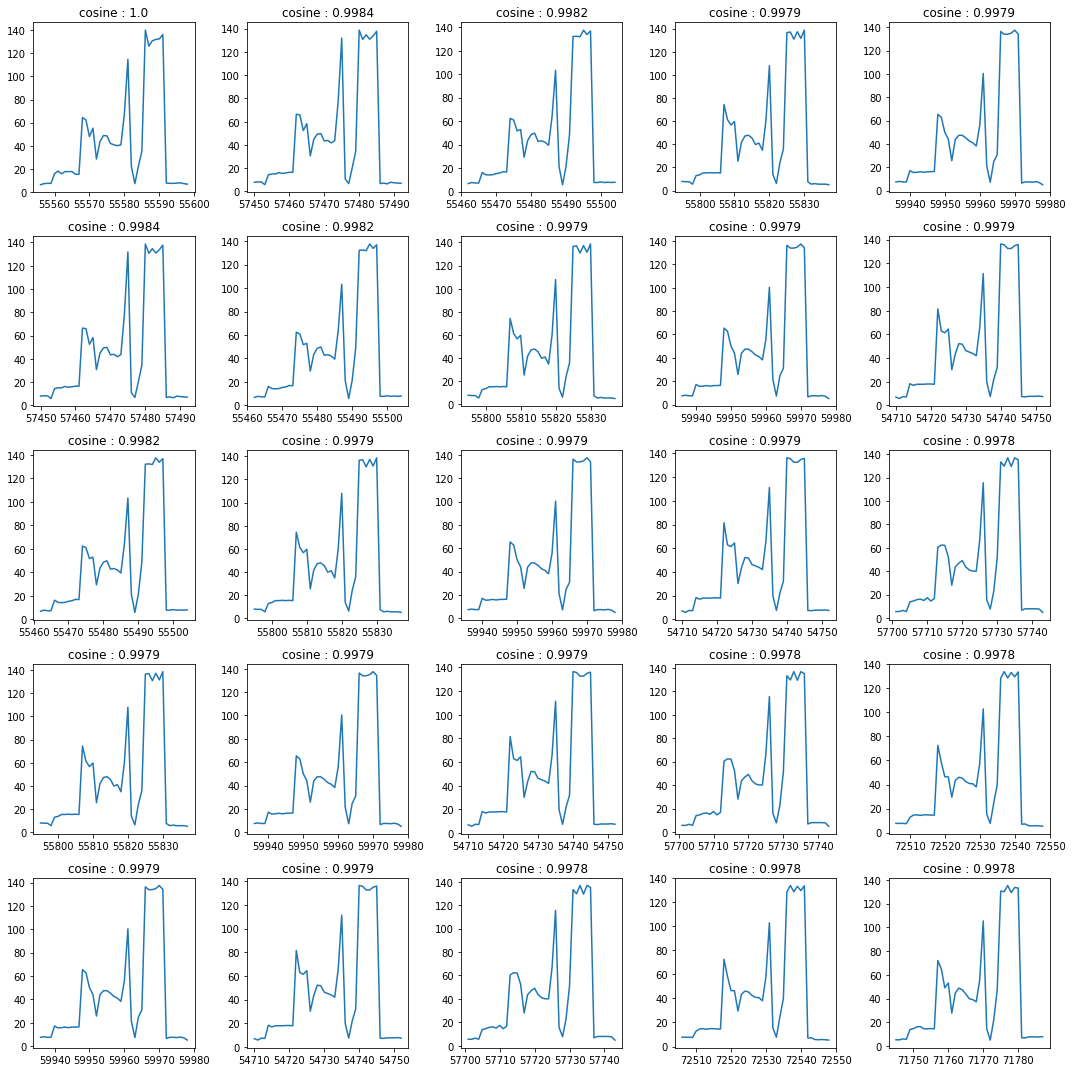

In [76]:
# 상위 25개 보여주기

for s in range(0, 1):
    fig, axes = plt.subplots(5, 5, figsize = (15, 15))
    for y in range(0, 5):
        for x in range(0, 5):
            axes[y][x].plot(find_sorted[(x+y)+25*s]['data_cal'])
            axes[y][x].set_title('cosine : {}'.format(round(find_sorted[x+y+25*s]['cosine'][0][0], 4)))
        
    plt.tight_layout()

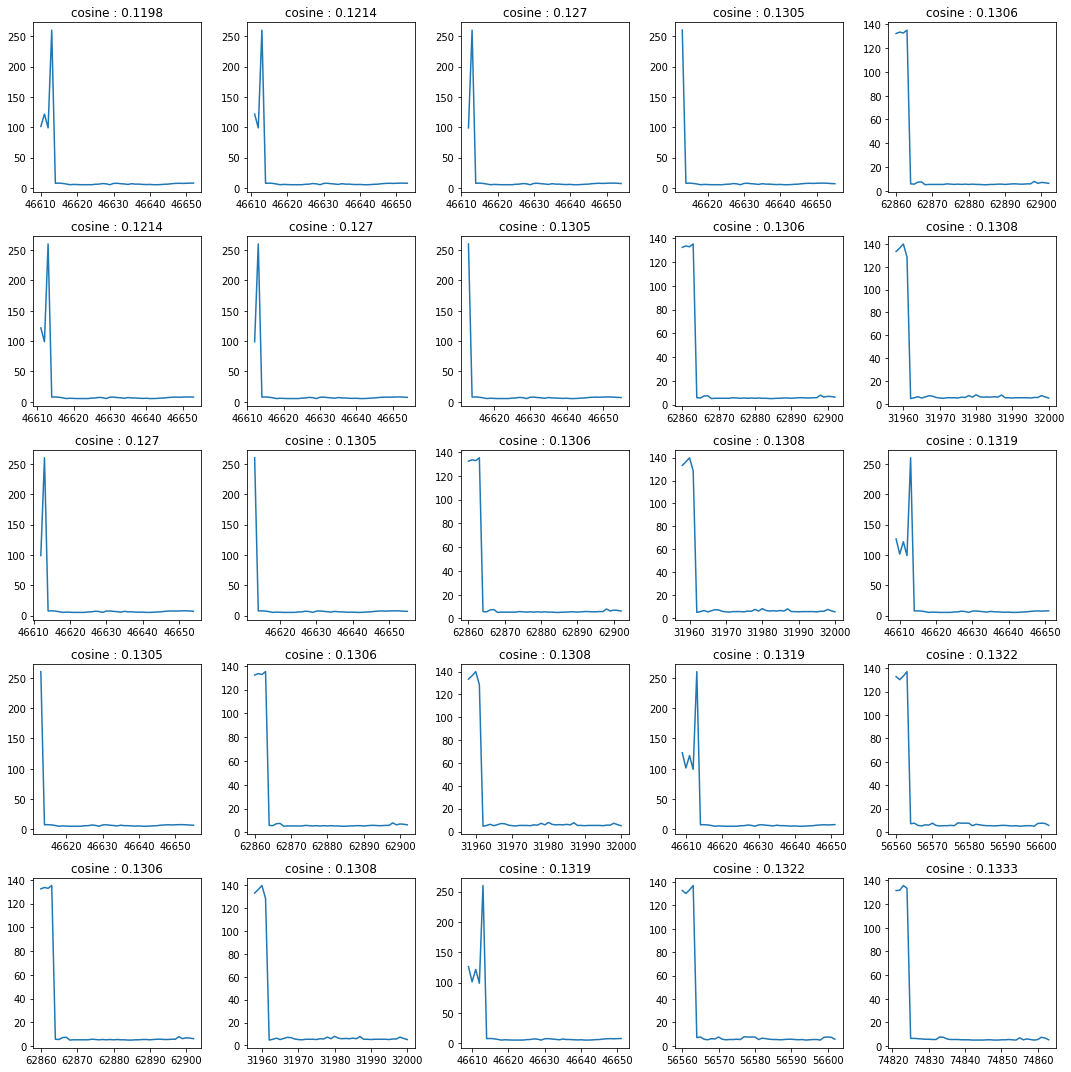

In [77]:
# 하위 25개 보여주기
find_sorted = sorted(find, key=itemgetter('cosine'), reverse= False)
for s in range(0, 1):
    fig, axes = plt.subplots(5, 5, figsize = (15, 15))
    for y in range(0, 5):
        for x in range(0, 5):
            axes[y][x].plot(find_sorted[(x+y)+25*s]['data_cal'])
            axes[y][x].set_title('cosine : {}'.format(round(find_sorted[x+y+25*s]['cosine'][0][0], 4)))
        
    plt.tight_layout()

* 전체 데이터에서 유사도를 그래프로 플로팅

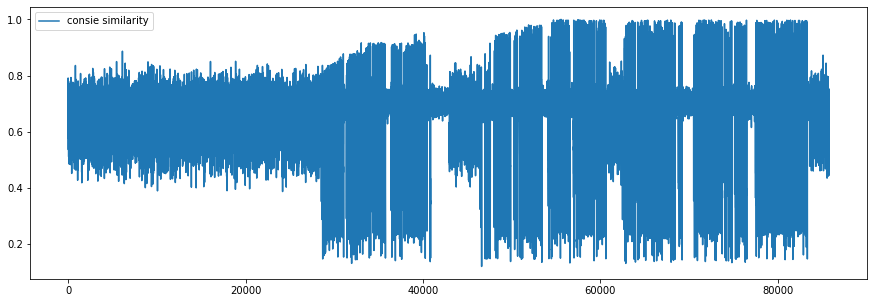

In [78]:
cosine_list = []
for i in range(len(find_sorted)):
    cosine_list.append(find_sorted[i]['cosine'][0][0])
    
index_list = []
for i in range(len(find_sorted)):
    index_list.append(find_sorted[i]['start_index'])
    
cosine_list = pd.Series(cosine_list)
index_list = pd.Series(index_list)

listed=  pd.concat((cosine_list, index_list), axis = 1)
listed.columns = ['cosine', 'index_list']
listed = listed.sort_values(by = 'index_list').reset_index(drop = True)
listed = listed.drop(columns = 'index_list')

listed['cosine'][:].plot(figsize = (15, 5), label = 'consie similarity')
plt.legend()
plt.show()

* 실제로 주기성을 띄는 데이터로 사용한 경우 주기 함수의 그래프가 나올 것이라 예상할 수 있다.
* 그러나 코사인 유사도는 shift를 반영하지 못한다.
* 관측 길이가 달라도 사용할 수 있다.

## **5. DTW(Dynamic Time Wraping)을 이용한 유사도 측정**
---


* Dynamic Time Warping은 음성인식에서 사용되던 기법으로, 두 시퀀스 간의 최적의 정렬(alignment)를 구하는데 사용한다.
* 시계열 데이터의 '시간'을 왜곡하는 기법으로 시퀀스의 길이나 속도에 관계없이 사용할 수 있다.


시퀀스 X와 Y가 있을 때, 이 둘을 x축, y 축에 늘어놓고 데이터 포인트간의 거리(유클리디언 거리)를 구하면 그 값은 매트릭스가 된다.

![](img/cost_matrix.png)

그 매트릭스를 히트맵으로 표현하면 위 그림처럼, 두 데이터 포인트간 거리가 짧은 곳은 어둡게, 거리가 먼 고은 흰색으로 표현된다. DTW는 저 코스트 캐트릭스 상의 좌하단에서 우상단까지 가는 최적의 경로를 찾는 문제를 푼다.

그런데 몇 가지 조건이 있다.
1. 두 시퀀스의 처음과 끝은 같아야 한다. 즉 무조건 좌하단에서 시작해서 우하단에서 끝난다.
2. x나 y축, 혹은 그 두 축에서 음의 방향으로 이동하지 않는다.
3. 이동할 때 정해진 스텝사이즈만큼 이동한다.

3번 조건은 경우에 따라 경로 검색 효율성을 높이기 위해 바뀌기도 한다. DTW는 결국 X와 Y를 늘어놓고 X의 특정 데이터포인트가 Y의 어떤 데이터포인트에 가장 적합한지를 판정하는 로직이므로, X와 Y의 길이가 늘어나면 늘어날수록 검색 비용이 들어간다.

무작정 비교하는 것은 매우 효율이 떨어지고 속도도 느리다. 게다가 전후 경로만 보고 기계적으로 두 시퀀스를 정렬시켜버리는 “pathological alignment”를 피해기 위해 여러 장치를 사용하는데, 이 중 자주 쓰이는 것이 “Sakoe-Chiba Band”와 “Itakura Parallelogram”이다.

![](img/sakoe.png)

Sakoe-Chiba Band는 대각선을 기준으로 허용하는 width T를 정해두고, 경로가 이를 벗어나지 않도록 강제한다. Itakura Parallogram은 S를 사용해 경로의 기울기가 1/S ~ S 사이에 위치하도록 하는 장치다. 이러한 기법을 사용하면 서치 스페이스를 크게 줄여 속도와 퀄리티를 개선할 수 있다. 하지만 세번째 그림처럼 옵티멀한 정렬이 강제 범위 밖에 위치할 수도 있다.


> 참고논문) An Effective Similarity Search Technique supporting Time Warping in Sequence Databases - Sang-Wook Kim, Sang-Hyun Park

### **데이터 준비 및 적용**
---

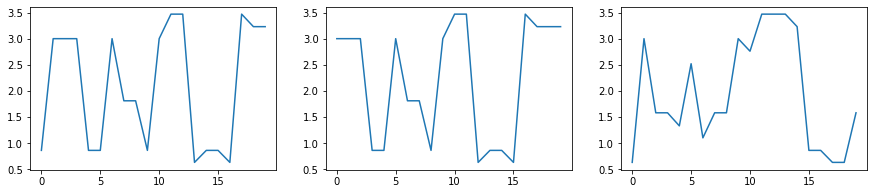

-0.2398676816510863 -1.2855219133444673 -0.7337102003925415


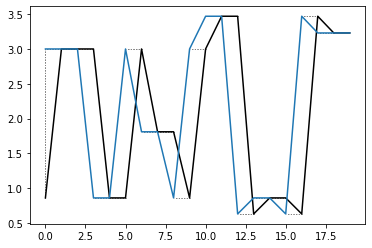

t0 and t1 dtw distance : 2.14


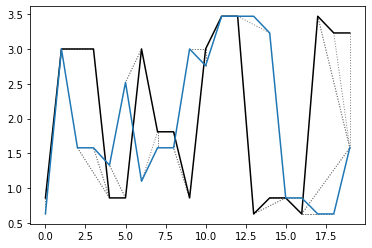

t0 and t1000 dtw distance" 14.2


In [84]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import dtw
import fastdtw.fastdtw
data = pd.read_csv('data_new.csv')
date = datetime.strptime(data['data_date'][0], '%Y-%m-%d %H:%M:%S.%f').strftime('%m/%d/%Y')
date = pd.DataFrame(data['data_date'])
data['date'] = date.applymap(str).applymap(lambda s: '{}-{}-{} {}:{}:{}'.format(
    s[0:4], s[5:7], s[8:10],s[11:13],s[14:16],s[17:19]))
data.index = pd.to_datetime(data['date'])
data = data.drop(columns = ['data_date', 'date'])
data = data['2020-12-09 00:00:00':'2020-12-09 23:59:59']
data.columns = ['oil_temperature']
data = pd.DataFrame(data.values.reshape(1, -1))

import numpy as np

list_12 = np.array([])
list_23 = np.array([])
list_13 = np.array([])


r = np.random.choice(10000, 1)
r = r[0]

t = 20
s = 1000

x1 = data.iloc[:, r:r+t].values
x2 = data.iloc[:, r+1:r+t+1].values
x3 = data.iloc[:, r+s:r+t+s].values

data_t = pd.DataFrame(data.values.reshape(-1, ))


x1_t = data_t.iloc[r:r+t].reset_index(drop = True)
x2_t = data_t.iloc[r+1:r+t+1].reset_index(drop = True)
x3_t = data_t.iloc[r+s:r+s+t].reset_index(drop = True)

p = np.arange(0, t, 1)

degree = 15

import matplotlib.pyplot as plt

fp1 = np.polyfit(p, x1.flatten(), degree)
f1 = np.poly1d(fp1)

fp2 = np.polyfit(p, x2.flatten(), degree)
f2 = np.poly1d(fp2)

fp3 = np.polyfit(p, x3.flatten(), degree)
f3 = np.poly1d(fp3)

fig, ax = plt.subplots(1, 3, figsize = (15, 3))
ax[0].plot(x1_t)
#ax[0].set_title('Reproduction : {}'.format(r2_score(x1_t, f1(p))))

ax[1].plot(x2_t)
#ax[1].set_title('Reproduction : {}'.format(r2_score(x2_t, f2(p))))


ax[2].plot(x3_t)
#ax[2].set_title('Reproduction : {}'.format(r2_score(x3_t, f3(p))))

plt.show()

from sklearn.metrics import r2_score, mean_squared_error

#print('자기 표현율 : {}, {}, {}'.format(r2_score(x1_t, f1(p)), r2_score(x2_t, f2(p)), r2_score(x3_t, f3(p))))

print(r2_score(f1(p), f2(p)), r2_score(f2(p), f3(p)), r2_score(f1(p), f3(p)))


dtw_01 = dtw.dtw(x1_t, x2_t, keep_internals=True)
dtw_01.plot(type = 'twoway')
plt.show()

print('t0 and t1 dtw distance : {}'.format(dtw_01.distance))

dtw_03 = dtw.dtw(x1_t, x3_t, keep_internals=True)
dtw_03.plot(type = 'twoway')
plt.show()

print('t0 and t1000 dtw distance" {}'.format(dtw_03.distance))

* 전체 데이터에 적용해본다

In [86]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import dtw
import fastdtw.fastdtw
import matplotlib.pyplot as plt

data = pd.read_csv('data_new.csv')
date = datetime.strptime(data['data_date'][0], '%Y-%m-%d %H:%M:%S.%f').strftime('%m/%d/%Y')
date = pd.DataFrame(data['data_date'])
data['date'] = date.applymap(str).applymap(lambda s: '{}-{}-{} {}:{}:{}'.format(
    s[0:4], s[5:7], s[8:10],s[11:13],s[14:16],s[17:19]))
data.index = pd.to_datetime(data['date'])
data = data.drop(columns = ['data_date', 'date'])
data = data['2020-12-09 00:00:00':'2020-12-09 23:59:59']
data.columns = ['oil_temperature']

# 파라미터 세팅
WINDOW_SIZE = 43
ADD_WINDOW = 3

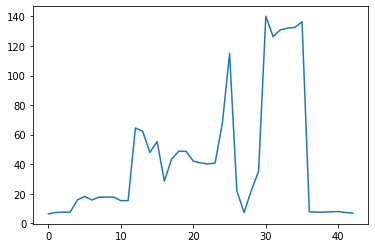

In [87]:
# 찾을 패턴 세팅
seed = np.random.choice(len(data), 1)[0]
data_search = data['2020-12-09 15:32:28':'2020-12-09 15:33:10'].reset_index(drop=True)

plt.plot(data_search)
plt.show()

In [88]:
data_cal = 0
find = []

for i in range(0, int((len(data)+1))):
    if i+WINDOW_SIZE <= len(data):
        data_cal = data.iloc[i:i+WINDOW_SIZE+3,]
        dtw = fastdtw.fastdtw(data_search, data_cal)[0]
        diction = {'data_cal':data_cal, 'dtw':dtw, 'start_index': i}
        find.append(diction)

* 유사도가 높은 상위 25개 출력

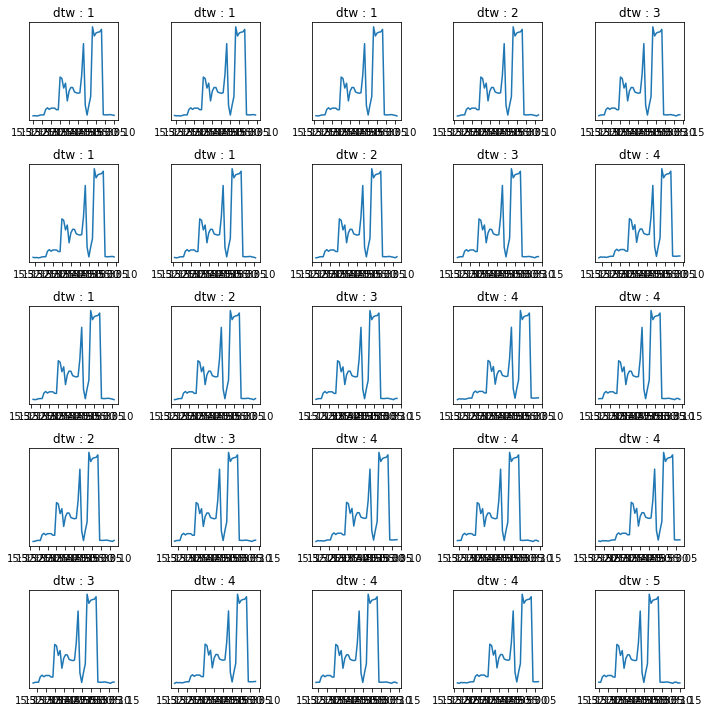

In [90]:
from operator import itemgetter

find_sorted = sorted(find, key=itemgetter('dtw'))

# 상위 25개 보여주기

for s in range(0, 1):
    fig, axes = plt.subplots(5, 5, figsize = (10, 10))
    for y in range(0, 5):
        for x in range(0, 5):
            axes[y][x].plot(find_sorted[(x+y)+25*s]['data_cal'])
            axes[y][x].set_title('dtw : {}'.format(round(find_sorted[x+y+25*s]['dtw'])))
            axes[y][x].yaxis.set_visible(False)
            
    s = s+1
   
    plt.tight_layout()

* 유사도가 낮은 하위 25개 출력

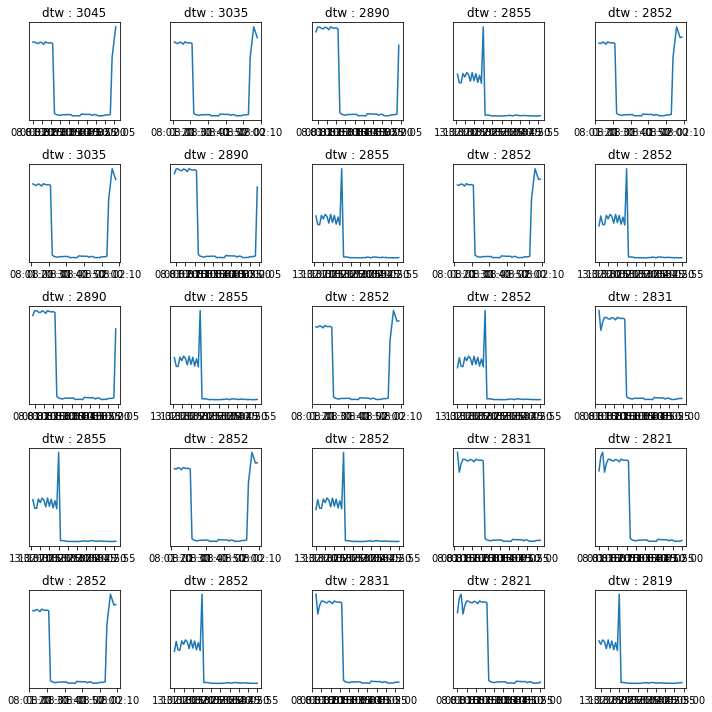

In [91]:
find_sorted = sorted(find, key=itemgetter('dtw'), reverse = True)

# 하위 25개 보여주기

for s in range(0, 1):
    fig, axes = plt.subplots(5, 5, figsize = (10, 10))
    for y in range(0, 5):
        for x in range(0, 5):
            axes[y][x].plot(find_sorted[(x+y)+25*s]['data_cal'])
            axes[y][x].set_title('dtw : {}'.format(round(find_sorted[x+y+25*s]['dtw'])))
            axes[y][x].yaxis.set_visible(False)
            
    s = s+1
   
    plt.tight_layout()

* 전체 데이터에 대한 유사도 측정

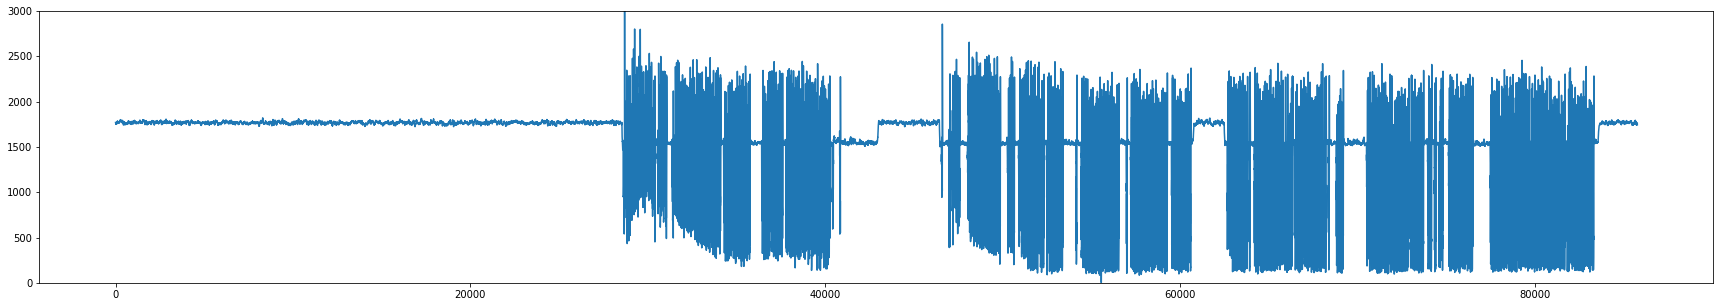

In [96]:
dtw_list = []
for i in range(len(find_sorted)):
    dtw_list.append(find_sorted[i]['dtw'])
    
index_list = []
for i in range(len(find_sorted)):
    index_list.append(find_sorted[i]['start_index'])

dtw_list = pd.Series(dtw_list)
index_list = pd.Series(index_list)

listed=  pd.concat((dtw_list, index_list), axis = 1)
listed.columns = ['dtw', 'index_list']
listed = listed.sort_values(by = 'index_list').reset_index(drop = True)
listed = listed.drop(columns = 'index_list')

listed['dtw'][:].plot(figsize = (30, 5), ylim = (0,3000))
plt.show()

* Standard scaling을 통해 좀 더 정규화하여 그래프 플로팅

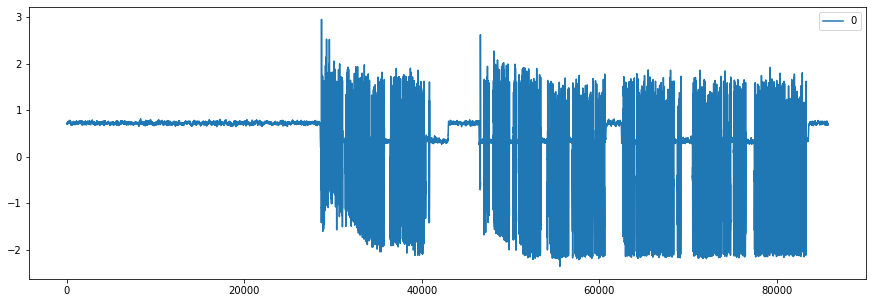

In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
listed_scaled = pd.DataFrame(scaler.fit_transform(listed))

listed_scaled.plot(figsize = (15, 5),)
plt.show()

### **결론**
---
* 관측 길이가 달라도 사용가능하다.
* Time Shift도 어느 정도 보정하는 것을 알 수 있다.
* 코사인 유사도과 달리 최대값, 최소값이 정해져있지 않아서 백분율로 치환하기 힘들다.
* Triangle Inequality(삼각부등식)을 만족하지 못하므로 유사 검색 시 착오 기각(false dismissal)이 발생 (착오 기각 : 실제 질의 결과로 반환되어야 할 질의 시퀀스와 유사한 시퀀스를 올바르게 찾아내지 못하는 현상)

### **Triangle Inequlity**

a와 b의 DTW distance = DTW(a,b) 일 때, 다음을 만족해야 삼각부등식을 만족한다고 한다.
    
**DTW(x,z) ≤ DTW(x,y) + DTW(y,z)**

* DTW가 삼각부등식을 만족하지 못하는 예시
    
x :=[0,1,1,2], y := [0,1,2], z:=[0,2,2] 일 때, 각 DTW distance는 다음과 같다.
    
**DTW(x,z) = 2, DTW(x,y) = 0, DTW(y,z) = 1**

위 공식을 삼각부등식에 적용하면, 아래와 같이 거짓이 나온다.
    
**2 ≤ 0 + 1**

* 따라서 삼각부등식을 만족하지 못하는 경우가 발생하므로 올바르게 찾아내지 못하는 경우가 생긴다.

## **LCSS (Longest Common Subsequence)**
---

* LCS란 Longest Common Subsequence의 약자로 최장 공통 부분 문자열이다.
* substring은 연속된 부분 문자열, subsequence는 연속적이지 않은 부분 문자열이다.
* 예로들어 iamhungry라는 문자열에서 연속된 부분 문자열인 mhun은 substring이 되고 연속적으로 이어지지는 않았지만 순서는 맞는 mugy는 subsequence가 된다.
* 대표적으로 LCSS가 쓰이는 곳은 염기서열 유사성 분석, 음파 단어 검색 및 교정 등에 사용된다.
* **매칭 민감도를 조절할 수 있다. Epsilon(amplitude matching threshold), Delta(time sample matching threshold)**
* 길이가 달라도 사용할 수 있다.

> https://twinw.tistory.com/126


* 데이터 적용 및 준비는 거의 동일하다.

In [94]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

import ts_dist
import pyximport; pyximport.install()
from ts_dist import dtw_dist as dtw_dist_py
from ts_dist import lcss_dist as lcss_dist_py
from ts_dist import edr_dist as edr_dist_py

data = pd.read_csv('data_new.csv')
date = datetime.strptime(data['data_date'][0], '%Y-%m-%d %H:%M:%S.%f').strftime('%m/%d/%Y')
date = pd.DataFrame(data['data_date'])
data['date'] = date.applymap(str).applymap(lambda s: '{}-{}-{} {}:{}:{}'.format(
    s[0:4], s[5:7], s[8:10],s[11:13],s[14:16],s[17:19]))
data.index = pd.to_datetime(data['date'])
data = data.drop(columns = ['data_date', 'date'])
data = data['2020-12-09 00:00:00':'2020-12-09 23:59:59']
data.columns = ['oil_temperature']


KeyError: 'data_date'

In [ ]:
# 파라미터 세팅
WINDOW_SIZE = 43
ADD_WINDOW = 3

# 찾을 패턴 세팅
seed = np.random.choice(len(data), 1)[0]
data_search = data['2020-12-09 15:32:28':'2020-12-09 15:33:10'].reset_index(drop=True)
plt.plot(data_search)
plt.show()

In [ ]:
data_cal = 0
find = []

for i in range(0, int((len(data)+1))):
    if i+WINDOW_SIZE <= len(data):
        data_cal = data.iloc[i:i+WINDOW_SIZE,]
        lcss = lcss_dist_py(data_search.T, data_cal.T,delta = np.inf, epsilon = 0.5)
        diction = {'data_cal':data_cal, 'lcss':lcss, 'start_index': i}
        find.append(diction)

In [ ]:
from operator import itemgetter

find_sorted = sorted(find, key=itemgetter('lcss'))

# 상위 25개 보여주기

for s in range(0, 1):
    fig, axes = plt.subplots(5, 5, figsize = (10, 10))
    for y in range(0, 5):
        for x in range(0, 5):
            axes[y][x].plot(find_sorted[(x+y)+25*s]['data_cal'])
            axes[y][x].set_title('lcss : {}'.format(round(find_sorted[x+y+25*s]['lcss'],3)))
            axes[y][x].yaxis.set_visible(False)
            
    s = s+1
   
    plt.tight_layout()

In [ ]:
find_sorted = sorted(find, key=itemgetter('lcss'), reverse = True)

# 하위 25개 보여주기

for s in range(0, 1):
    fig, axes = plt.subplots(5, 5, figsize = (10, 10))
    for y in range(0, 5):
        for x in range(0, 5):
            axes[y][x].plot(find_sorted[(x+y)+25*s]['data_cal'])
            axes[y][x].set_title('lcss : {}'.format(round(find_sorted[x+y+25*s]['lcss'])))
            axes[y][x].yaxis.set_visible(False)
            
    s = s+1
   
    plt.tight_layout()

In [ ]:
edr_list = []
for i in range(len(find_sorted)):
    edr_list.append(find_sorted[i]['lcss'])
    
index_list = []
for i in range(len(find_sorted)):
    index_list.append(find_sorted[i]['start_index'])

edr_list = pd.Series(edr_list)
index_list = pd.Series(index_list)

listed=  pd.concat((edr_list, index_list), axis = 1)
listed.columns = ['lcss', 'index_list']
listed = listed.sort_values(by = 'index_list').reset_index(drop = True)
listed = listed.drop(columns = 'index_list')

listed['lcss'][:].plot(figsize = (15, 5), ylim = (0,1.1))
plt.show()

### **결론**
---
* 파라미터 조정을 하면 조금 덜 민감하게 가능하다.
* 파라모터 조절을 통해 민감도를 조정할 수 있다는게 인상적

## **7. EDR(Edit distance on Real Sequence)**
---

* 편집거리 알고리즘
* 노이즈 추가 등 다양한 경우에서 DTW, LCSS 보다 더 나은 성능을 보여준다.
* 파라미터로 민감도를 조정할 수 있다.
> Lei  Chan, M. Tamer Ozsu. Vincent Oria. Robust and Fast Similarity Search for Moving Object Trajectories

![](img/edr.png)

* https://hsp1116.tistory.com/41

### **데이터 준비 및 적용**
---

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

import ts_dist
import pyximport; pyximport.install()
from ts_dist import dtw_dist as dtw_dist_py
from ts_dist import lcss_dist as lcss_dist_py
from ts_dist import edr_dist as edr_dist_py

date = pd.DataFrame(data['data_date'])
data['date'] = date.applymap(str).applymap(lambda s: '{}-{}-{} {}:{}:{}'.format(
    s[0:4], s[5:7], s[8:10],s[11:13],s[14:16],s[17:19]))
data.index = pd.to_datetime(data['date'])
data = data.drop(columns = ['data_date', 'date'])
data = data['2020-12-09 00:00:00':'2020-12-09 23:59:59']

In [ ]:
# 파라미터 세팅
WINDOW_SIZE = 43
ADD_WINDOW = 3

# 찾을 패턴 세팅
seed = np.random.choice(len(data), 1)[0]
data_search = data['2020-12-09 15:32:28':'2020-12-09 15:33:10'].reset_index(drop=True)

plt.plot(data_search)
plt.show()

In [ ]:
data_cal = 0
find = []

for i in range(0, int((len(data)+1))):
    if i+WINDOW_SIZE <= len(data):
        data_cal = data.iloc[i:i+WINDOW_SIZE,]
        edr = edr_dist_py(data_search.T, data_cal.T, epsilon = 0.5)
        diction = {'data_cal':data_cal, 'edr':edr, 'start_index': i}
        find.append(diction)

In [ ]:
from operator import itemgetter

find_sorted = sorted(find, key=itemgetter('edr'))

# 상위 25개 보여주기

for s in range(0, 1):
    fig, axes = plt.subplots(5, 5, figsize = (10, 10))
    for y in range(0, 5):
        for x in range(0, 5):
            axes[y][x].plot(find_sorted[(x+y)+25*s]['data_cal'])
            axes[y][x].set_title('edr : {}'.format(round(find_sorted[x+y+25*s]['edr'],3)))
            axes[y][x].yaxis.set_visible(False)
            
    s = s+1
   
    plt.tight_layout()

In [ ]:
find_sorted = sorted(find, key=itemgetter('edr'), reverse = True)

# 하위 25개 보여주기

for s in range(0, 1):
    fig, axes = plt.subplots(5, 5, figsize = (10, 10))
    for y in range(0, 5):
        for x in range(0, 5):
            axes[y][x].plot(find_sorted[(x+y)+25*s]['data_cal'])
            axes[y][x].set_title('edr : {}'.format(round(find_sorted[x+y+25*s]['edr'])))
            axes[y][x].yaxis.set_visible(False)
            
    s = s+1
   
    plt.tight_layout()

In [ ]:
edr_list = []
for i in range(len(find_sorted)):
    edr_list.append(find_sorted[i]['edr'])
    
index_list = []
for i in range(len(find_sorted)):
    index_list.append(find_sorted[i]['start_index'])

edr_list = pd.Series(edr_list)
index_list = pd.Series(index_list)

listed=  pd.concat((edr_list, index_list), axis = 1)
listed.columns = ['edr', 'index_list']
listed = listed.sort_values(by = 'index_list').reset_index(drop = True)
listed = listed.drop(columns = 'index_list')

listed['edr'][:].plot(figsize = (30, 5), ylim = (0,1))
plt.show()